## Plan
- [ ] follow https://duckdb.org/docs/guides/python/jupyter.html
- [ ] follow https://github.com/onefact/datathinking.org-codespace/blob/main/notebooks/in-class-notebooks/230406-data-build-tool-for-new-york-city-311-phone-call-data.ipynb
- [ ] load csv file in duckdb

In [1]:
import duckdb
import pandas as pd
# No need to import duckdb_engne
#  jupysql will auto-detect thei driver needed based on the connection string!

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql


In [2]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False


In [3]:
%sql duckdb:///:memory:

In [4]:
!/opt/homebrew/bin/wget https://data.payless.health/health.data.ny.gov%2FNYSDOH_BRFSS_SurveyData_2021.csv -O /tmp/NYSDOH_BRFSS_SurveyData_2021.csv

--2023-04-13 15:21:22--  https://data.payless.health/health.data.ny.gov%2FNYSDOH_BRFSS_SurveyData_2021.csv
Resolving data.payless.health (data.payless.health)... 18.164.116.15, 18.164.116.102, 18.164.116.105, ...
Connecting to data.payless.health (data.payless.health)|18.164.116.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407489625 (389M) [text/csv]
Saving to: ‘/tmp/NYSDOH_BRFSS_SurveyData_2021.csv’

/tmp/NYSDOH_BRFSS_S 100%[===================>] 388.61M  52.0MB/s    in 7.6s    

2023-04-13 15:21:30 (50.9 MB/s) - ‘/tmp/NYSDOH_BRFSS_SurveyData_2021.csv’ saved [407489625/407489625]



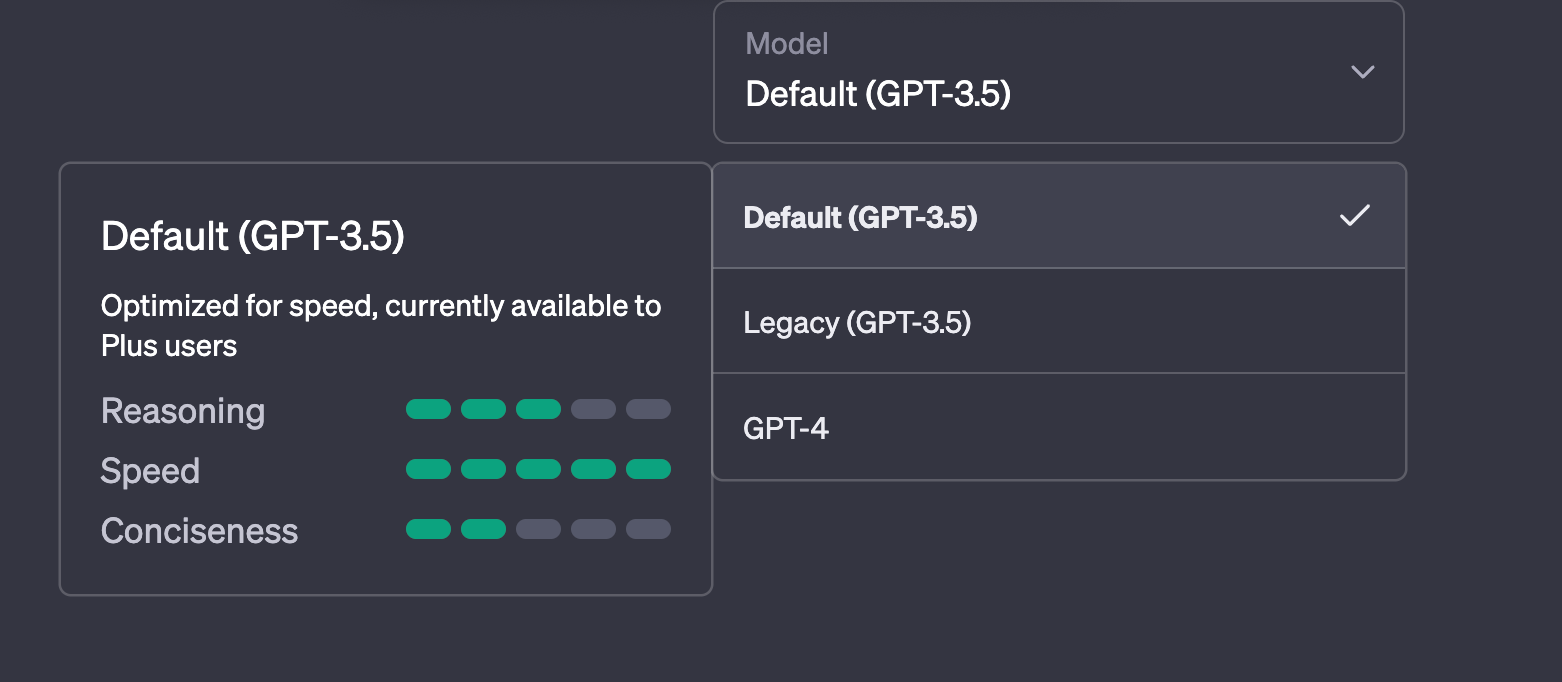

prompts:

Hi GPT-4! I need to load this csv file with duckdb using the `read_csv_auto` function, the file is here: ‘/tmp/NYSDOH_BRFSS_SurveyData_2021.csv’

import pandas as pd

input_csv_path = '/tmp/NYSDOH_BRFSS_SurveyData_2021.csv'
output_csv_path = '/tmp/NYSDOH_BRFSS_SurveyData_2021_fixed.csv'

# Read the CSV file with a specific encoding, such as 'ISO-8859-1' or 'utf-8'
df = pd.read_csv(input_csv_path, encoding='ISO-8859-1')

# Write the DataFrame to a new CSV file with UTF-8 encoding
df.to_csv(output_csv_path, index=False, encoding='utf-8')


"17": Invalid unicode (byte sequence mismatch) detected in CSV file. 

import duckdb

con = duckdb.connect(':memory:')
table_name = 'nysdoh_brfss_survey_data_2021'
csv_path = '/tmp/NYSDOH_BRFSS_SurveyData_2021_fixed.csv'
query = f"CREATE TABLE {table_name} AS SELECT * FROM read_csv_auto('{csv_path}')"

con.execute(query)

result = con.execute(f"SELECT * FROM {table_name}").fetchall()

print(result)

^^ NB : THIS CODE CRASHED MY JUPYTER NOTEBOOK

In [5]:
import pandas as pd

input_csv_path = '/tmp/NYSDOH_BRFSS_SurveyData_2021.csv'
output_csv_path = '/tmp/NYSDOH_BRFSS_SurveyData_2021_fixed.csv'

# Read the CSV file with a specific encoding, such as 'ISO-8859-1' or 'utf-8'
df = pd.read_csv(input_csv_path, encoding='ISO-8859-1')

# Write the DataFrame to a new CSV file with UTF-8 encoding
df.to_csv(output_csv_path, index=False, encoding='utf-8')

/var/folders/2c/hmpw9qgd7fd3x0ms6548_f880000gn/T/ipykernel_17996/3275190520.py:7: DtypeWarning: Columns (47,148,279,284,285,298,299,300,329,330,331,332,333,334,335,336,337,350,362) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv_path, encoding='ISO-8859-1')


## GPT-4 prompt engineering
Hi GPT-4! I need to load this file, '/tmp/NYSDOH_BRFSS_SurveyData_2021_fixed.csv', with duckdb using the read_csv_auto function and the jupysql magic in a jupyter notebook. Can you please help write the code for this?

In [6]:
%%sql
-- Create table from the CSV file using read_csv_auto function
CREATE TABLE nysdoh_brfss_surveydata AS SELECT * FROM read_csv_auto('/tmp/NYSDOH_BRFSS_SurveyData_2021_fixed.csv');

-- Execute a simple query to test the table
SELECT * FROM nysdoh_brfss_surveydata LIMIT 5;


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SEQNO,_PSU,COLGSEX,LANDSEX,...,VIRCOLO1_SA,VCLNTES1_SA,SMALSTOL_SA,STOLTEST_SA,STOOLDN1_SA,BLDSTFIT_SA,SDNATES1_SA,STRSMEAL,HLTHPREG,COVIDDX
0,New York,1,2022021,2,2,2021,2021005661,2021005661,Not asked or Missing,Not asked or Missing,...,Yes,Within the past year (anytime less than 12 mon...,No,None,No,None,None,Never,None,None
1,New York,1,2112021,2,11,2021,2021000539,2021000539,Not asked or Missing,Female,...,None,None,None,None,None,None,None,None,None,None
2,New York,1,2272021,2,27,2021,2021010546,2021010546,Not asked or Missing,Not asked or Missing,...,None,None,None,None,None,None,None,None,None,None
3,New York,1,1312021,1,31,2021,2021005662,2021005662,Not asked or Missing,Not asked or Missing,...,None,None,None,None,None,None,None,Never,None,None
4,New York,1,2212021,2,21,2021,2021010547,2021010547,Not asked or Missing,Not asked or Missing,...,None,None,None,None,None,None,None,None,None,None


<Axes: title={'center': "'_PSU' from '/tmp/NYSDOH_BRFSS_SurveyData_2021_fixed.csv'"}, ylabel='_PSU'>

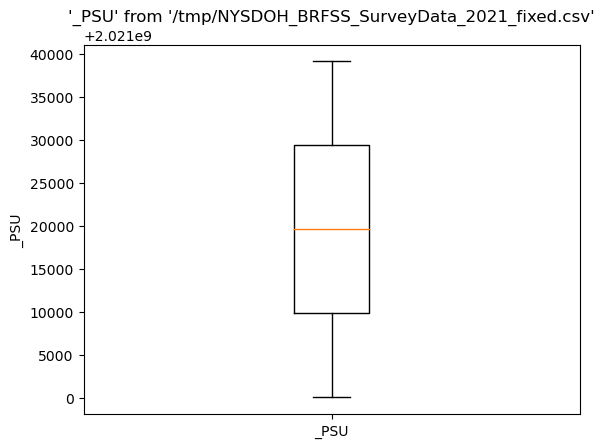

In [7]:
%sqlplot boxplot --table /tmp/NYSDOH_BRFSS_SurveyData_2021_fixed.csv --column _PSU

In [28]:
# Load CSV file into a pandas DataFrame
df = pd.read_csv('/Users/micheletadiello/Downloads/NYSDOH_BRFSS_2021/NYSDOH_BRFSS_SurveyData_2021.csv', encoding='iso-8859-1')

# Create a duckdb database in memory
con = duckdb.connect(':memory:')

# Use the to_sql() method to create a new table in the duckdb database
df.to_sql('my_table_sdoh', con, if_exists='replace', index=False)

# Execute a SQL query against the duckdb database
results = con.execute('SELECT * FROM my_table_sdoh').fetchdf()

# Print the results
print(results)

/var/folders/1_/lmhbpfjd78x39hf7h6ttny5r0000gn/T/ipykernel_47055/560215762.py:2: DtypeWarning: Columns (47,148,279,284,285,298,299,300,329,330,331,332,333,334,335,336,337,350,362) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/micheletadiello/Downloads/NYSDOH_BRFSS_2021/NYSDOH_BRFSS_SurveyData_2021.csv', encoding='iso-8859-1')
/var/folders/1_/lmhbpfjd78x39hf7h6ttny5r0000gn/T/ipykernel_47055/560215762.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df.to_sql('my_table_sdoh', con, if_exists='replace', index=False)


TransactionException: TransactionContext Error: cannot rollback - no transaction is active

In [42]:
import duckdb
import pandas as pd
from sqlalchemy import create_engine

# Read the CSV file with dtype=str
df = pd.read_csv('/Users/micheletadiello/Downloads/NYSDOH_BRFSS_2021/NYSDOH_BRFSS_SurveyData_2021.csv', encoding='iso-8859-1', dtype=str)

# Create a DuckDB engine using SQLAlchemy
engine = create_engine('duckdb://')

# Use the to_sql() method to create a new table in the duckdb database
df.to_sql ('my_table_SDOH',engine, if_exists='replace', index=False)


-1

In [51]:
SELECT * FROM 'my_table'

SyntaxError: invalid syntax (675648636.py, line 1)

In [54]:
import duckdb

# Connect to the DuckDB database
con = duckdb.connect(':memory:')

# Create a new table
con.execute('CREATE TABLE my_table (id INTEGER, name VARCHAR(255))')

# List all the tables in the database
result = con.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = [row[0] for row in result.fetchall()]
print(tables) # Output: ['my_table']




['my_table']


In [60]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('your_database.db')

# Define the query
query = "SELECT name FROM sqlite_master WHERE type='table' AND name='your_table_name'"

# Execute the query and fetch the result
result = conn.execute(query).fetchall()

# Check if the result is empty
if len(result) == 0:
    print("The table does not exist in the database")
else:
    print("The table exists in the database")
    
# Close the connection
conn.close()




SyntaxError: invalid syntax (163088762.py, line 1)

In [63]:
import os

# replace 'my_database.db' with the name of your database file
db_file = 'my_database.db'

# get the current working directory
cwd = os.getcwd()

# join the database file name with the current working directory
db_path = os.path.join(cwd, db_file)

print("The path to my database file is:", db_path)


The path to my database file is: /Users/micheletadiello/Desktop/payless.health-quality-metrics-1/notebooks/my_database.db


In [64]:
import duckdb

# connect to the database
con = duckdb.connect(database='/Users/micheletadiello/Desktop/payless.health-quality-metrics-1/notebooks/my_database.db')

# get the database name
database_name = con.execute('SELECT current_database()').fetchone()[0]

print(database_name)


my_database


In [65]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('my_database')

# Define the query
query = "SELECT name FROM sqlite_master WHERE type='table' AND name='my_table'"

# Execute the query and fetch the result
result = conn.execute(query).fetchall()

# Check if the result is empty
if len(result) == 0:
    print("The table does not exist in the database")
else:
    print("The table exists in the database")
    
# Close the connection
conn.close()


The table does not exist in the database


In [66]:
import duckdb
import pandas as pd

# Connect to your DuckDB database
con = duckdb.connect(database='mydatabase')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/Users/micheletadiello/Downloads/NYSDOH_BRFSS_2021/NYSDOH_BRFSS_SurveyData_2021.csv', encoding='iso-8859-1', dtype=str)

# Insert the DataFrame into a new table in your DuckDB database
df.to_sql('my_table', con, if_exists='replace', index=False)


/var/folders/1_/lmhbpfjd78x39hf7h6ttny5r0000gn/T/ipykernel_47055/1598971818.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df.to_sql('my_table', con, if_exists='replace', index=False)


## Documentation to load csv to duckdb for use in SQL queries
https://duckdb.org/docs/data/csv/overview.html

In [8]:
%%sql
-- read a CSV from stdin, auto-infer options
cat data/csv/issue2471.csv | duckdb -c "select * from read_csv_auto('/dev/stdin')"

(duckdb.ParserException) Parser Error: syntax error at or near "cat"
LINE 2: cat data/csv/issue2471.csv | duckdb -c "select * from read_csv_auto('/dev/stdin')"...
        ^
[SQL: -- read a CSV from stdin, auto-infer options
cat data/csv/issue2471.csv | duckdb -c "select * from read_csv_auto('/dev/stdin')"]
(Background on this error at: https://sqlalche.me/e/20/f405)


In [9]:
!cat data/csv/issue2471.csv | duckdb -c "select * from read_csv_auto('/dev/stdin')"

zsh:1: command not found: duckdb
cat: data/csv/issue2471.csv: No such file or directory
